<a href="https://colab.research.google.com/github/VedantDere0104/GANs/blob/main/DCGANs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
######

In [35]:
import torch
from torch import nn
from tqdm.auto import tqdm
from torchvision import transforms
from torchvision.datasets import MNIST
from torchvision.utils import make_grid
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [56]:
def show_tensor_images(image_tensor, num_images=25, size=(1, 28, 28)):

    image_tensor = (image_tensor + 1) / 2
    image_unflat = image_tensor.detach().cpu()
    image_grid = make_grid(image_unflat[:num_images], nrow=5)
    plt.imshow(image_grid.permute(1, 2, 0).squeeze())
    plt.show()

In [57]:

class Generator(nn.Module):

    def __init__(self, z_dim=10, im_chan=1, hidden_dim=64):
        super(Generator, self).__init__()
        self.z_dim = z_dim
        # Build the neural network
        self.gen = nn.Sequential(
            self.make_gen_block(z_dim, hidden_dim * 4),
            self.make_gen_block(hidden_dim * 4, hidden_dim * 2, kernel_size=4, stride=1),
            self.make_gen_block(hidden_dim * 2, hidden_dim),
            self.make_gen_block(hidden_dim, im_chan, kernel_size=4, final_layer=True),
        )

    def make_gen_block(self, input_channels, output_channels, kernel_size=3, stride=2, final_layer=False):

        if not final_layer:
            return nn.Sequential(

                nn.ConvTranspose2d(input_channels , output_channels , kernel_size , stride) , 
                nn.BatchNorm2d(output_channels) , 
                nn.ReLU(inplace = True)
         
            )
        else: 
            return nn.Sequential(
            
                nn.ConvTranspose2d(input_channels , output_channels , kernel_size , stride) , 
                nn.Tanh()
                
            )

    def unsqueeze_noise(self, noise):
     
        return noise.view(len(noise), self.z_dim, 1, 1)

    def forward(self, noise):
   
        x = self.unsqueeze_noise(noise)
        return self.gen(x)

def get_noise(n_samples, z_dim, device='cpu'):

    return torch.randn(n_samples, z_dim, device=device)

In [58]:

class Discriminator(nn.Module):
 
    def __init__(self, im_chan=1, hidden_dim=16):
        super(Discriminator, self).__init__()
        self.disc = nn.Sequential(
            self.make_disc_block(im_chan, hidden_dim),
            self.make_disc_block(hidden_dim, hidden_dim * 2),
            self.make_disc_block(hidden_dim * 2, 1, final_layer=True),
        )

    def make_disc_block(self, input_channels, output_channels, kernel_size=4, stride=2, final_layer=False):
     
        if not final_layer:
            return nn.Sequential(
               
                nn.Conv2d(input_channels, output_channels, kernel_size, stride),
                nn.BatchNorm2d(output_channels),
                nn.LeakyReLU(0.2, inplace=True)
               
            )
        else: 
            return nn.Sequential(
              
                nn.Conv2d(input_channels, output_channels, kernel_size, stride)
             
            )

 
    def forward(self, image):
        disc_pred = self.disc(image)
        return disc_pred.view(len(disc_pred), -1)

In [59]:
criterion = nn.BCEWithLogitsLoss()
z_dim = 64
display_step = 500
batch_size = 128

lr = 0.0002

beta_1 = 0.5 
beta_2 = 0.999
device = 'cuda'


transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),
])

dataloader = DataLoader(
    MNIST('.', download=False, transform=transform),
    batch_size=batch_size,
    shuffle=True)

In [60]:
gen = Generator(z_dim).to(device)
gen_opt = torch.optim.Adam(gen.parameters(), lr=lr, betas=(beta_1, beta_2))
disc = Discriminator().to(device) 
disc_opt = torch.optim.Adam(disc.parameters(), lr=lr, betas=(beta_1, beta_2))

def weights_init(m):
    if isinstance(m, nn.Conv2d) or isinstance(m, nn.ConvTranspose2d):
        torch.nn.init.normal_(m.weight, 0.0, 0.02)
    if isinstance(m, nn.BatchNorm2d):
        torch.nn.init.normal_(m.weight, 0.0, 0.02)
        torch.nn.init.constant_(m.bias, 0)
gen = gen.apply(weights_init)
disc = disc.apply(weights_init)

Step 500: Generator loss: 1.0682168536186216, discriminator loss: 0.48244735920429177


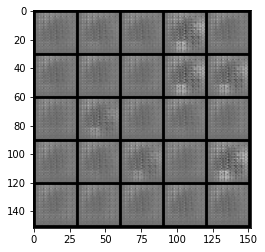

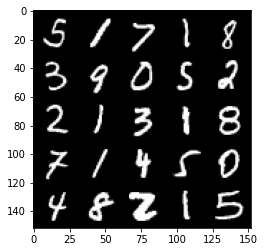

Step 1000: Generator loss: 1.963111307293178, discriminator loss: 0.3134910053014755


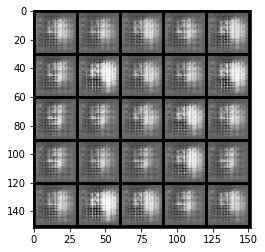

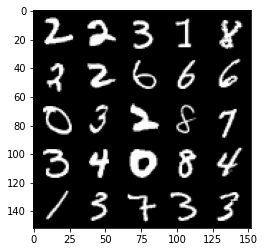

Step 1500: Generator loss: 1.7624845996499063, discriminator loss: 0.37563334789872144


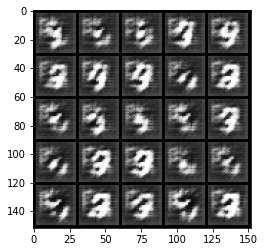

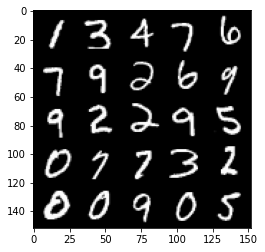

Step 2000: Generator loss: 1.193126047551633, discriminator loss: 0.5305867754518988


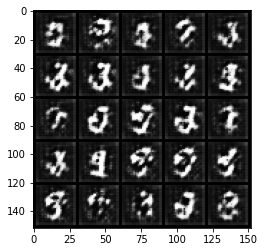

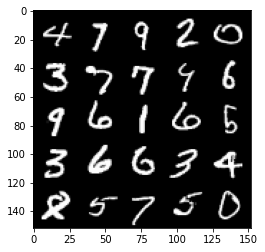

Step 2500: Generator loss: 1.029260105937719, discriminator loss: 0.5576014568209641


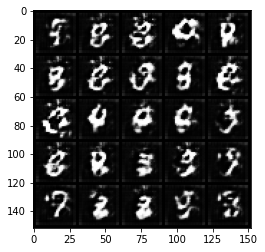

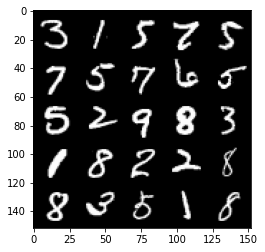

Step 3000: Generator loss: 0.9260355206131935, discriminator loss: 0.5850217283964152


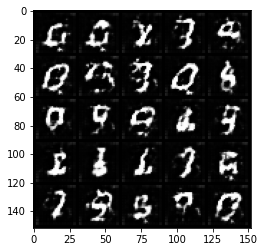

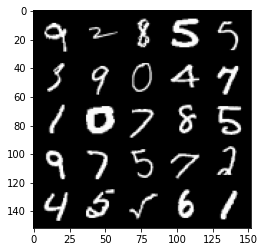

Step 3500: Generator loss: 0.8578231089115145, discriminator loss: 0.6254740883111953


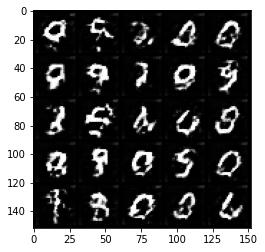

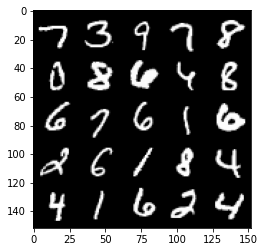

Step 4000: Generator loss: 0.8033530003428454, discriminator loss: 0.6423135975599286


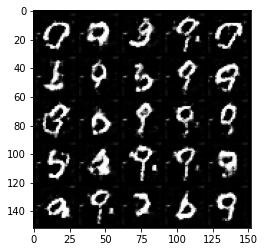

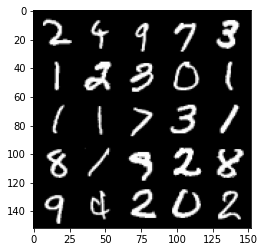

Step 4500: Generator loss: 0.7775675480961799, discriminator loss: 0.6618108102083202


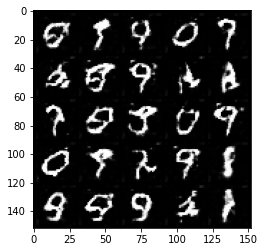

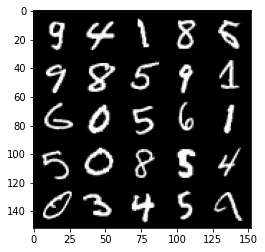

Step 5000: Generator loss: 0.7659572094678873, discriminator loss: 0.6743226718902587


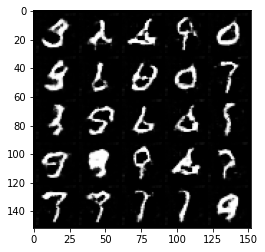

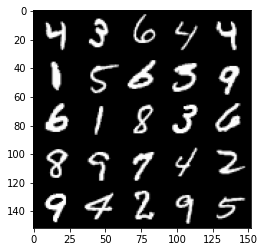

Step 5500: Generator loss: 0.7516777417659753, discriminator loss: 0.6742224892377858


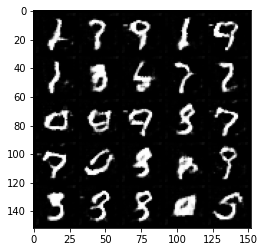

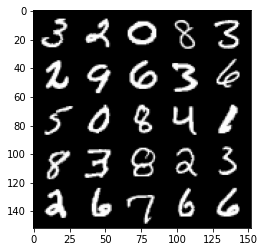

Step 6000: Generator loss: 0.762324537813664, discriminator loss: 0.6769042552709581


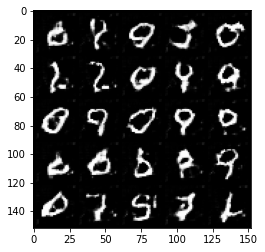

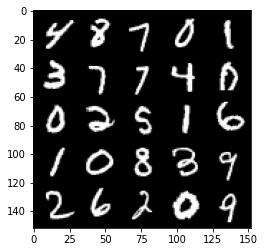

Step 6500: Generator loss: 0.7565145045518872, discriminator loss: 0.6762501685619348


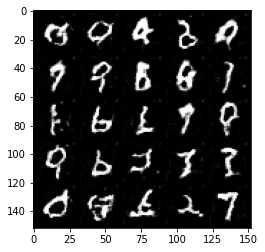

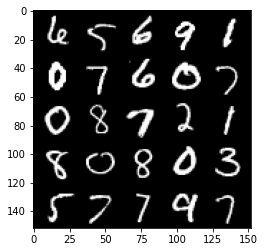

Step 7000: Generator loss: 0.754842031478882, discriminator loss: 0.6792709037065499


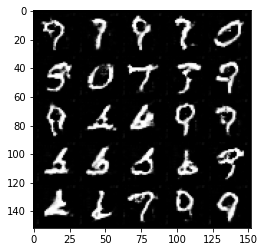

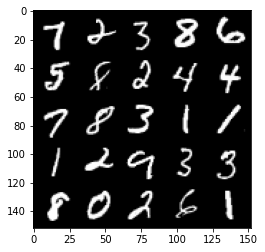

Step 7500: Generator loss: 0.7541449640393253, discriminator loss: 0.6794037176370622


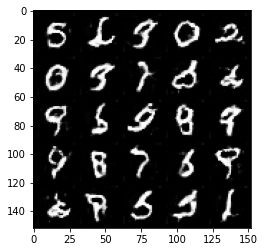

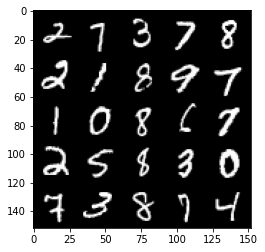

Step 8000: Generator loss: 0.7491303875446317, discriminator loss: 0.6791143400669098


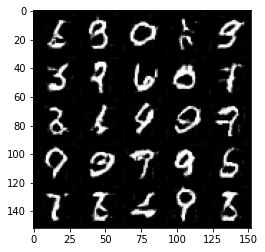

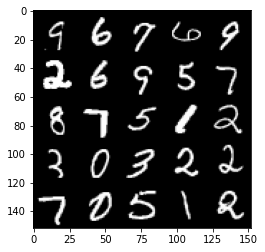

Step 8500: Generator loss: 0.751988585293293, discriminator loss: 0.6794512701034549


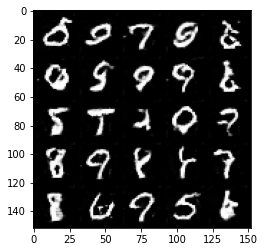

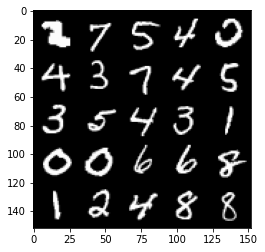

Step 9000: Generator loss: 0.7466598889231687, discriminator loss: 0.6814798935651772


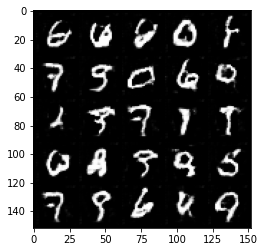

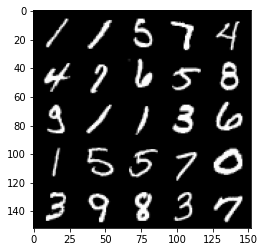

Step 9500: Generator loss: 0.7410713002681732, discriminator loss: 0.6833837954998015


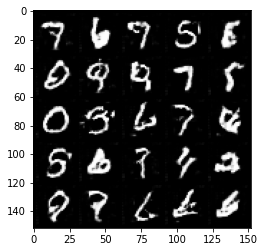

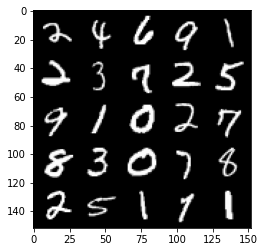

Step 10000: Generator loss: 0.738734252750874, discriminator loss: 0.6842060143947596


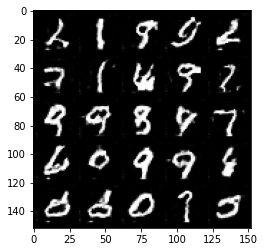

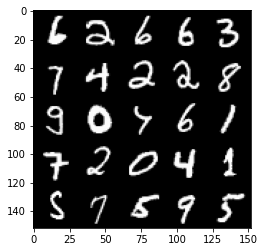

Step 10500: Generator loss: 0.7348937600851062, discriminator loss: 0.6845603190660475


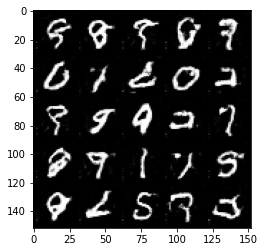

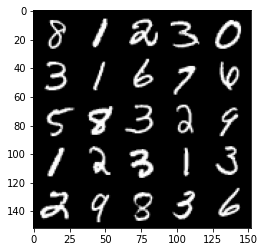

Step 11000: Generator loss: 0.7363012559413903, discriminator loss: 0.684097352862358


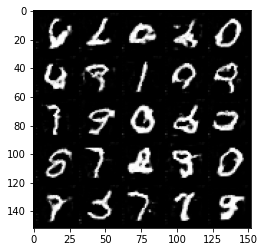

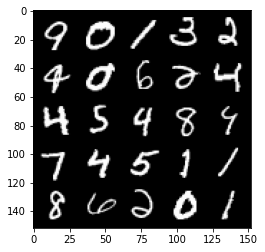

Step 11500: Generator loss: 0.7372394662499429, discriminator loss: 0.685766268968582


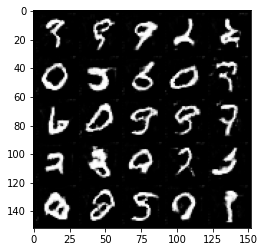

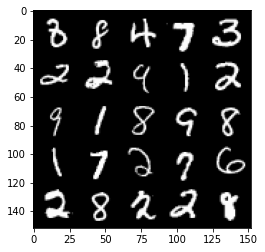

Step 12000: Generator loss: 0.7342890745997428, discriminator loss: 0.6854472792148593


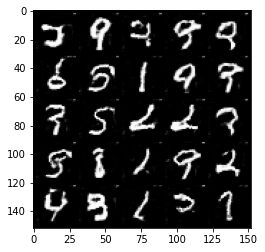

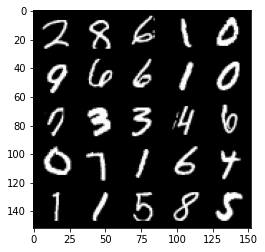

Step 12500: Generator loss: 0.7302838851809509, discriminator loss: 0.6875439208745957


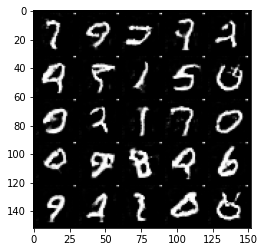

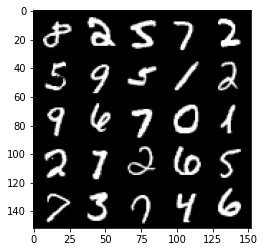

Step 13000: Generator loss: 0.7269247248172762, discriminator loss: 0.6898104006052023


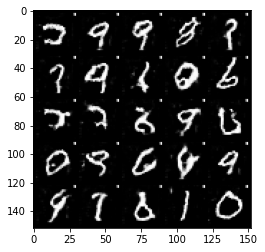

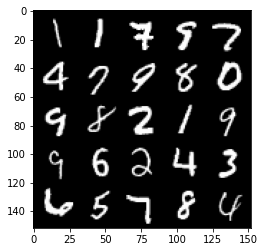

Step 13500: Generator loss: 0.721489931762218, discriminator loss: 0.6909598243236552


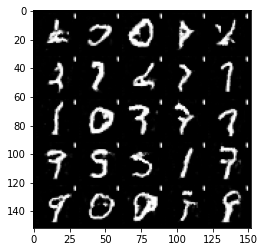

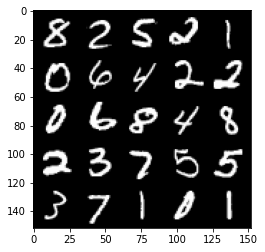

Step 14000: Generator loss: 0.7212397892475124, discriminator loss: 0.690481058478355


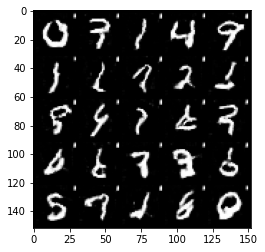

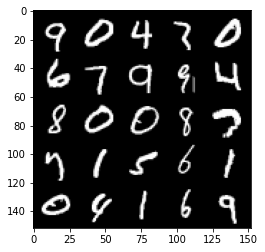

Step 14500: Generator loss: 0.7212833679318422, discriminator loss: 0.6904705241918565


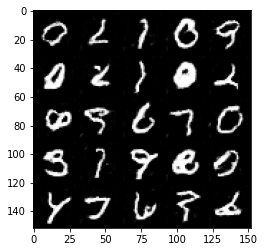

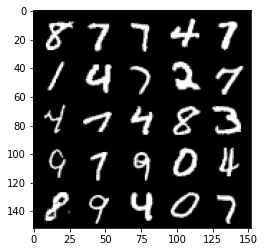

Step 15000: Generator loss: 0.7197949911952016, discriminator loss: 0.6913113861083985


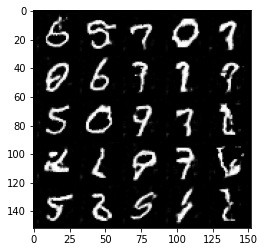

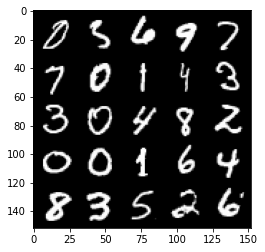

Step 15500: Generator loss: 0.7157490984797477, discriminator loss: 0.6942545747756956


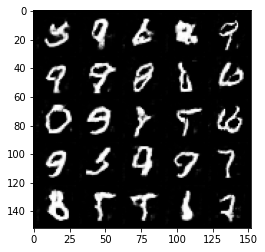

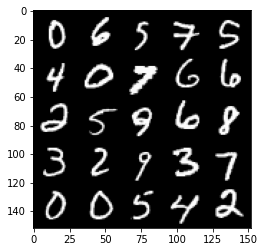

Step 16000: Generator loss: 0.7136692463159561, discriminator loss: 0.6917699482440949


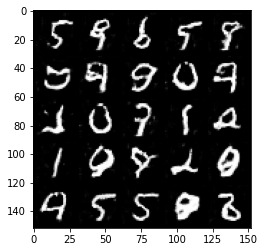

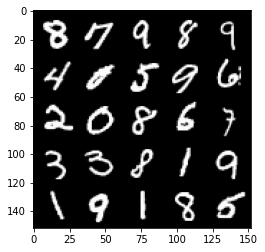

Step 16500: Generator loss: 0.7126397382020956, discriminator loss: 0.6944116611480712


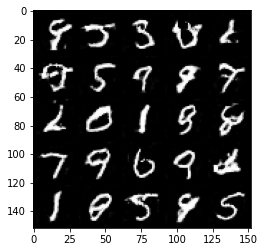

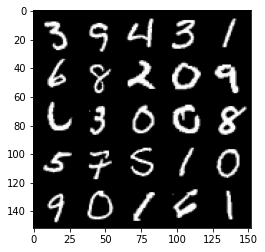

Step 17000: Generator loss: 0.7124565569758412, discriminator loss: 0.6955469396114345


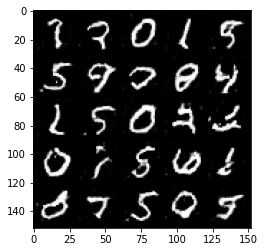

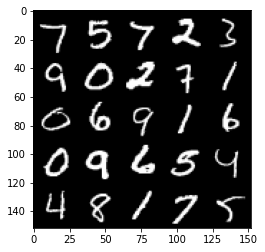

Step 17500: Generator loss: 0.7117199407815934, discriminator loss: 0.6947825655937194


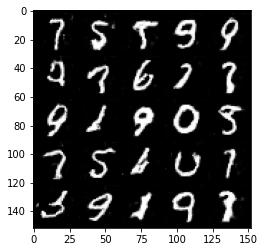

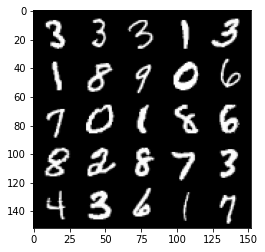

Step 18000: Generator loss: 0.7124306815862651, discriminator loss: 0.6947659047842026


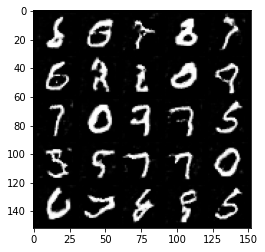

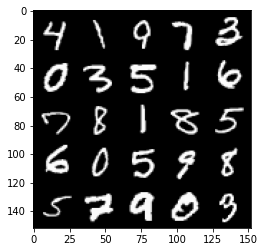

Step 18500: Generator loss: 0.709148737370968, discriminator loss: 0.6942843353748325


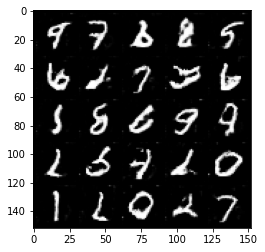

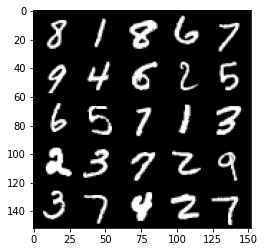

Step 19000: Generator loss: 0.7095392788052564, discriminator loss: 0.6939474192857744


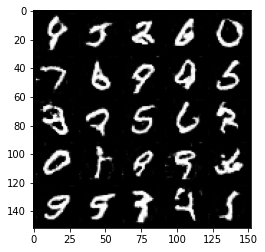

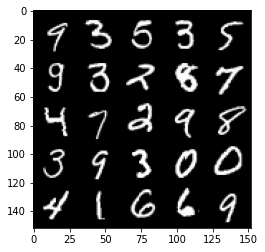

Step 19500: Generator loss: 0.7081160588264463, discriminator loss: 0.6940230464935306


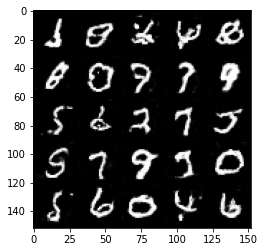

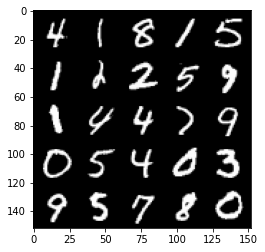

Step 20000: Generator loss: 0.7090588025450704, discriminator loss: 0.6943492649793619


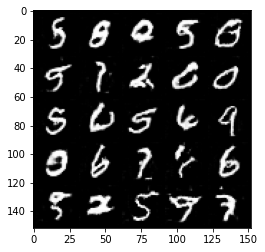

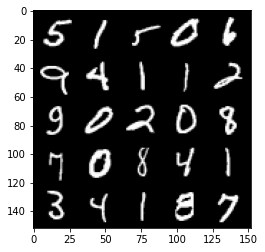

Step 20500: Generator loss: 0.7066101703047746, discriminator loss: 0.6944779084920878


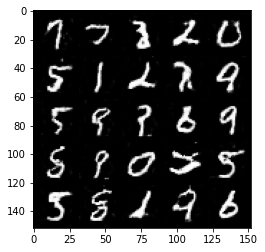

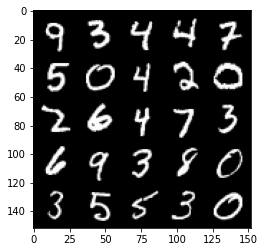

Step 21000: Generator loss: 0.7069412572383874, discriminator loss: 0.6937516222000122


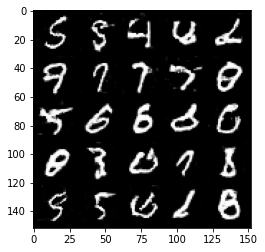

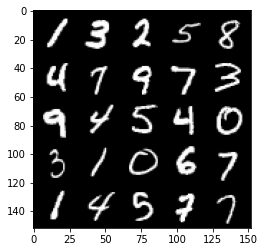

Step 21500: Generator loss: 0.7068326635360722, discriminator loss: 0.6948639738559715


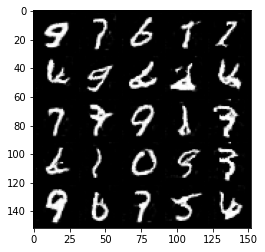

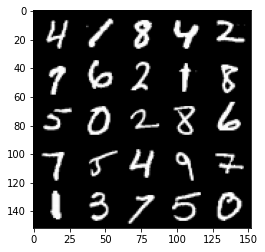

Step 22000: Generator loss: 0.7045385667681687, discriminator loss: 0.69493127143383


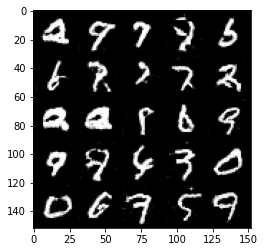

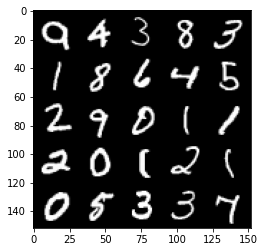

Step 22500: Generator loss: 0.7044739176630979, discriminator loss: 0.694633829593658


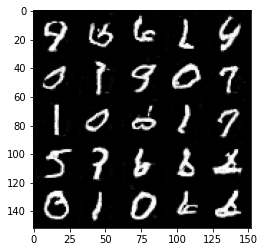

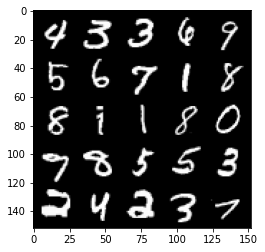

Step 23000: Generator loss: 0.7025442287921901, discriminator loss: 0.6966702636480339


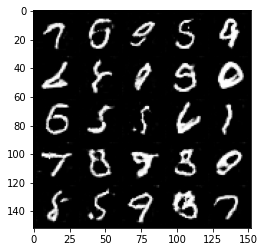

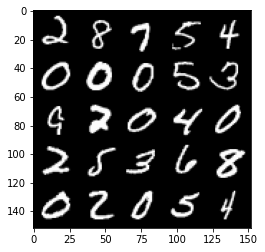

Step 23500: Generator loss: 0.703310600876809, discriminator loss: 0.6945678405761725


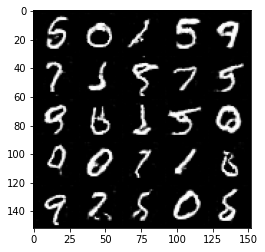

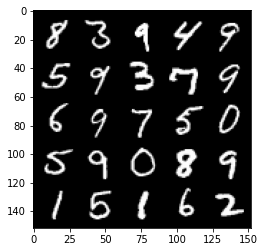

Step 24000: Generator loss: 0.7024132341146465, discriminator loss: 0.6943523402214051


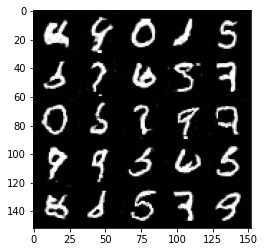

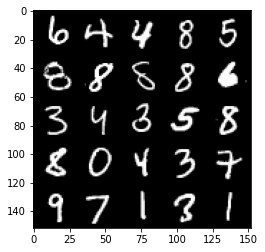

KeyboardInterrupt: ignored

In [61]:
n_epochs = 150
cur_step = 0
mean_generator_loss = 0
mean_discriminator_loss = 0
for epoch in range(n_epochs):
   
    for real, _ in tqdm(dataloader):
        cur_batch_size = len(real)
        real = real.to(device)


        disc_opt.zero_grad()
        fake_noise = get_noise(cur_batch_size, z_dim, device=device)
        fake = gen(fake_noise)
        disc_fake_pred = disc(fake.detach())
        disc_fake_loss = criterion(disc_fake_pred, torch.zeros_like(disc_fake_pred))
        disc_real_pred = disc(real)
        disc_real_loss = criterion(disc_real_pred, torch.ones_like(disc_real_pred))
        disc_loss = (disc_fake_loss + disc_real_loss) / 2

       
        mean_discriminator_loss += disc_loss.item() / display_step
    
        disc_loss.backward(retain_graph=True)

        disc_opt.step()


        gen_opt.zero_grad()
        fake_noise_2 = get_noise(cur_batch_size, z_dim, device=device)
        fake_2 = gen(fake_noise_2)
        disc_fake_pred = disc(fake_2)
        gen_loss = criterion(disc_fake_pred, torch.ones_like(disc_fake_pred))
        gen_loss.backward()
        gen_opt.step()

  
        mean_generator_loss += gen_loss.item() / display_step

        if cur_step % display_step == 0 and cur_step > 0:
            print(f"Step {cur_step}: Generator loss: {mean_generator_loss}, discriminator loss: {mean_discriminator_loss}")
            show_tensor_images(fake)
            show_tensor_images(real)
            mean_generator_loss = 0
            mean_discriminator_loss = 0
        cur_step += 1